# Summary: 
This notebook contains the soft smoothing figures for Haverford(Figure 2(d)).

## load libraries

In [2]:
from __future__ import division

import networkx as nx

import numpy as np
import os
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

import matplotlib.pyplot as plt

## function to create + save dictionary of features
def create_dict(key, obj):
    return(dict([(key[i], obj[i]) for i in range(len(key))]))

## load helper functions and datasets

In [3]:
# set the working directory and import helper functions
#get the current working directory and then redirect into the functions under code 
cwd = os.getcwd()

# parents working directory of the current directory: which is the code folder
parent_cwd = os.path.dirname(cwd)
# get into the functions folder
functions_cwd = parent_cwd + '/functions'
# change the working directory to be .../functions
os.chdir(functions_cwd)

# import all helper functions
exec(open('parsing.py').read())
exec(open('ZGL.py').read())
exec(open('create_graph.py').read())
exec(open('ZGL_softing_new_new.py').read())


# import the data from the data folder
data_cwd = os.path.dirname(parent_cwd)+ '/data'

# change the working directory and import the fb dataset
fb100_file = data_cwd +'/Haverford76'

A, metadata = parse_fb100_mat_file(fb100_file)

# change A(scipy csc matrix) into a numpy matrix
adj_matrix_tmp = A.todense()
#get the gender for each node(1/2,0 for missing)
gender_y_tmp = metadata[:,1] 
# get the corresponding gender for each node in a disctionary form
gender_dict = create_dict(range(len(gender_y_tmp)), gender_y_tmp)


#exec(open("/Users/yatong_chen/Google Drive/research/DSG_empirical/code/functions/create_graph.py").read())
(graph, gender_y)  = create_graph(adj_matrix_tmp,gender_dict,'gender',0,None,'yes')


## Setup

In [4]:
adj_matrix_gender = np.array(nx.adjacency_matrix(graph).todense()) 
percent_initially_unlabelled = [0.99,0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05] 
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)    
n_iter = 10
cv_setup = 'stratified'
w = [0.1,1,10,100,1000,10000]

## Hard Smoothing (ZGL method)

In [7]:
# run ZGL part
#adj_matrix_tmp_ZGL = adj_matrix_tmp
(mean_accuracy_zgl_Haverford, se_accuracy_zgl_Haverford, 
mean_micro_auc_zgl_Haverford,se_micro_auc_zgl_Haverford, 
mean_wt_auc_zgl_Haverford,se_wt_auc_zgl_Haverford) =ZGL(np.array(adj_matrix_gender),
                                    np.array(gender_y),percent_initially_unlabelled, 
                                    n_iter,cv_setup)

0.99


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05


## Soft smoothing (with different parameters w)

In [8]:
# NEW NEW ZGL without original training node
(graph, gender_y)  = create_graph(adj_matrix_tmp,gender_dict,'gender',0,None,'yes')

(mean_accuracy_zgl_softing_new_new_Haverford01, se_accuracy_zgl_softing_new_new_Haverford01, 
mean_micro_auc_zgl_softing_new_new_Haverford01,se_micro_auc_zgl_softing_new_new_Haverford01, 
mean_wt_auc_zgl_softing_new_new_Haverford01,se_wt_auc_zgl_softing_new_new_Haverford01) = ZGL_softing_new_new(w[0], adj_matrix_tmp,
                                    gender_dict,'gender', percent_initially_unlabelled, n_iter,cv_setup)

(mean_accuracy_zgl_softing_new_new_Haverford1, se_accuracy_zgl_softing_new_new_Haverford1, 
mean_micro_auc_zgl_softing_new_new_Haverford1,se_micro_auc_zgl_softing_new_new_Haverford1, 
mean_wt_auc_zgl_softing_new_new_Haverford1,se_wt_auc_zgl_softing_new_new_Haverford1) = ZGL_softing_new_new(w[1], adj_matrix_tmp,
                                    gender_dict,'gender', percent_initially_unlabelled, n_iter,cv_setup)


(mean_accuracy_zgl_softing_new_new_Haverford10, se_accuracy_zgl_softing_new_new_Haverford10, 
mean_micro_auc_zgl_softing_new_new_Haverford10,se_micro_auc_zgl_softing_new_new_Haverford10, 
mean_wt_auc_zgl_softing_new_new_Haverford10,se_wt_auc_zgl_softing_new_new_Haverford10) = ZGL_softing_new_new(w[2], adj_matrix_tmp,
                                    gender_dict,'gender', percent_initially_unlabelled, n_iter,cv_setup)


(mean_accuracy_zgl_softing_new_new_Haverford100, se_accuracy_zgl_softing_new_new_Haverford100, 
mean_micro_auc_zgl_softing_new_new_Haverford100,se_micro_auc_zgl_softing_new_new_Haverford100, 
mean_wt_auc_zgl_softing_new_new_Haverford100,se_wt_auc_zgl_softing_new_new_Haverford100) = ZGL_softing_new_new(w[3], adj_matrix_tmp,
                                    gender_dict,'gender', percent_initially_unlabelled, n_iter,cv_setup)



(mean_accuracy_zgl_softing_new_new_Haverford1000, se_accuracy_zgl_softing_new_new_Haverford1000, 
mean_micro_auc_zgl_softing_new_new_Haverford1000,se_micro_auc_zgl_softing_new_new_Haverford1000, 
mean_wt_auc_zgl_softing_new_new_Haverford1000,se_wt_auc_zgl_softing_new_new_Haverford1000) = ZGL_softing_new_new(w[4], adj_matrix_tmp,
                                    gender_dict,'gender', percent_initially_unlabelled, n_iter,cv_setup)

(mean_accuracy_zgl_softing_new_new_Haverford10000, se_accuracy_zgl_softing_new_new_Haverford10000, 
mean_micro_auc_zgl_softing_new_new_Haverford10000,se_micro_auc_zgl_softing_new_new_Haverford10000, 
mean_wt_auc_zgl_softing_new_new_Haverford10000,se_wt_auc_zgl_softing_new_new_Haverford10000) = ZGL_softing_new_new(w[5], adj_matrix_tmp,
                                    gender_dict,'gender', percent_initially_unlabelled, n_iter,cv_setup)

/Users/yatong_chen/Google Drive/research/DSG_empirical/code/functions
0.99
here


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.95
here
0.9
here
0.8
here
0.7
here
0.6
here
0.5
here
0.4
here
0.3
here
0.2
here
0.1
here
0.05
here
/Users/yatong_chen/Google Drive/research/DSG_empirical/code/functions
0.99
here


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.95
here
0.9
here
0.8
here
0.7
here
0.6
here
0.5
here
0.4
here
0.3
here
0.2
here
0.1
here
0.05
here
/Users/yatong_chen/Google Drive/research/DSG_empirical/code/functions
0.99
here


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.95
here
0.9
here
0.8
here
0.7
here
0.6
here
0.5
here
0.4
here
0.3
here
0.2
here
0.1
here
0.05
here
/Users/yatong_chen/Google Drive/research/DSG_empirical/code/functions
0.99
here
0.95
here
0.9
here
0.8
here
0.7
here
0.6
here
0.5
here
0.4
here
0.3
here
0.2
here
0.1
here
0.05
here
/Users/yatong_chen/Google Drive/research/DSG_empirical/code/functions
0.99
here


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.95
here
0.9
here
0.8
here
0.7
here
0.6
here
0.5
here
0.4
here
0.3
here
0.2
here
0.1
here
0.05
here
/Users/yatong_chen/Google Drive/research/DSG_empirical/code/functions
0.99
here


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.95
here
0.9
here
0.8
here
0.7
here
0.6
here
0.5
here
0.4
here
0.3
here
0.2
here
0.1
here
0.05
here


## Plot: 
AUC against Initial unlabled node precentage

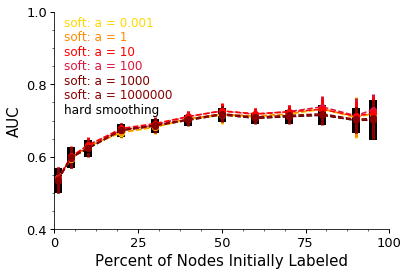

In [9]:
%matplotlib inline
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter

fig = plt.figure()
#seaborn.set_style(style='white')
from mpl_toolkits.axes_grid1 import Grid
grid = Grid(fig, rect=111, nrows_ncols=(1,1),
            axes_pad=0.1, label_mode='L')
for i in range(4):
    if i == 0:
        # set the x and y axis
        grid[i].xaxis.set_major_locator(FixedLocator([0,25,50,75,100]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.4, 0.5,0.6,0.7,0.8,0.9,1]))

        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_zgl_Haverford,
            yerr=se_wt_auc_zgl_Haverford, fmt='--o', capthick=2,
            alpha=1, elinewidth=8, color='black')

        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_zgl_softing_new_new_Haverford01,
            yerr=se_wt_auc_zgl_softing_new_new_Haverford01, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='gold')
        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_zgl_softing_new_new_Haverford1,
            yerr=se_wt_auc_zgl_softing_new_new_Haverford1, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='darkorange')        
        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_zgl_softing_new_new_Haverford10,
            yerr=se_wt_auc_zgl_softing_new_new_Haverford10, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='crimson')     

        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_zgl_softing_new_new_Haverford100,
            yerr=se_wt_auc_zgl_softing_new_new_Haverford100, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='red') 

        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_zgl_softing_new_new_Haverford1000,
            yerr=se_wt_auc_zgl_softing_new_new_Haverford1000, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='maroon') 
        
        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_zgl_softing_new_new_Haverford10000,
            yerr=se_wt_auc_zgl_softing_new_new_Haverford10000, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='darkred')         

        
        grid[i].set_ylim(0.45,1)
        grid[i].set_xlim(0,101)
        
        
        grid[i].annotate('soft: a = 0.001', xy=(3, 0.96), 
                 color='gold', alpha=1, size=12)
        grid[i].annotate('soft: a = 1', xy=(3, 0.92), 
                 color='darkorange', alpha=1, size=12)
        grid[i].annotate('soft: a = 10', xy=(3, 0.88), 
                 color='red', alpha=1, size=12)
        grid[i].annotate('soft: a = 100', xy=(3, 0.84), 
                 color='crimson', alpha=1, size=12)        
        grid[i].annotate('soft: a = 1000', xy=(3, 0.80), 
                 color='maroon', alpha=1, size=12)
        grid[i].annotate('soft: a = 1000000', xy=(3, 0.76), 
                 color='darkred', alpha=1, size=12)          
        grid[i].annotate('hard smoothing', xy=(3, 0.72), 
                 color='black', alpha=1, size=12)        
       
        grid[i].set_ylim(0.4,0.8)
        grid[i].set_xlim(0,100)
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].tick_params(axis='both', which='major', labelsize=13)
        grid[i].tick_params(axis='both', which='minor', labelsize=13)
        grid[i].set_xlabel('Percent of Nodes Initially Labeled').set_fontsize(15)
        grid[i].set_ylabel('AUC').set_fontsize(15)

grid[0].set_xticks([0,25, 50, 75, 100])
grid[0].set_yticks([0.4,0.6,0.8,1])


grid[0].minorticks_on()
grid[0].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
